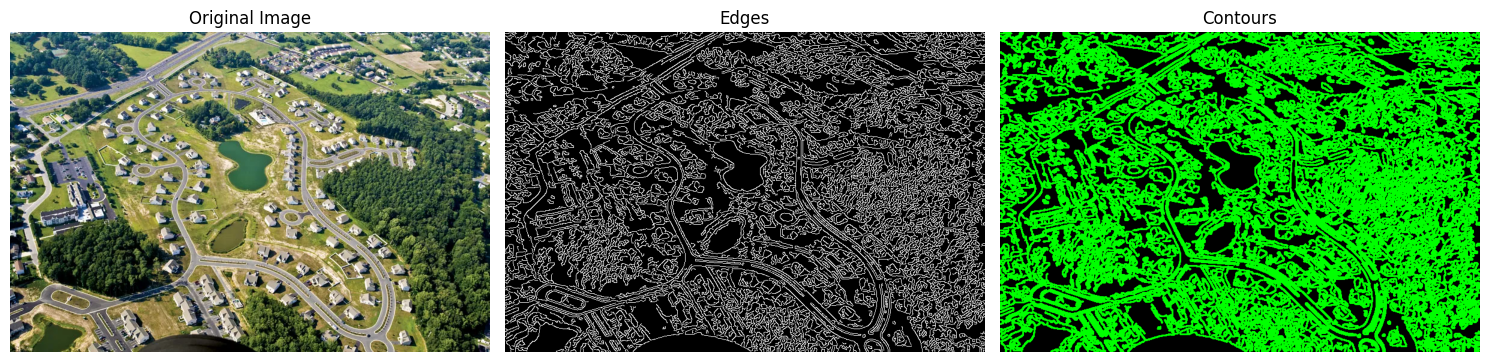

In [1]:
import cv2 # Imports the OpenCV library for computer vision tasks.
import numpy as np # Imports the NumPy library for numerical operations, especially array manipulation.
import matplotlib.pyplot as plt # Imports the Matplotlib library for plotting and visualization.

def load_image(image_path):
    """Load an image from the specified path."""
    image = cv2.imread(image_path) # Reads the image from the given path using OpenCV's imread function.
    if image is None: # Checks if the image was loaded successfully (returns None if not found).
        raise FileNotFoundError(f"Image not found at {image_path}") # Raises a FileNotFoundError if the image is not found.
    return image # Returns the loaded image.

def preprocess_image(image):
    """Convert the image to grayscale and apply Gaussian blur."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converts the image to grayscale.
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0) # Applies Gaussian blur with a 5x5 kernel to smooth the image.
    return blurred_image # Returns the preprocessed image.

def extract_edges(image):
    """Extract edges using the Canny edge detection algorithm."""
    edges = cv2.Canny(image, threshold1=50, threshold2=150) # Applies Canny edge detection with specified thresholds.
    return edges # Returns the image with detected edges.

def detect_contours(edges):
    """Detect contours in the edge-detected image."""
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Finds contours in the edge image. RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours. CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.
    return contours # Returns the detected contours.

def visualize_features(original_image, edges, contours):
    """Visualize the original image, edges, and detected contours."""
    # Create a blank canvas for contours
    contour_image = np.zeros_like(original_image) # Creates a blank image with the same size and type as the original image.
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2) # Draws the contours on the blank image in green.
    
    # Convert images to RGB for matplotlib visualization
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) # Converts the original image from BGR (OpenCV default) to RGB (Matplotlib default).
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB) # Converts the edge image from grayscale to RGB.
    contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB) # Converts the contour image from BGR to RGB.
    
    # Plot the results
    plt.figure(figsize=(15, 10)) # Creates a Matplotlib figure with a specified size.
    
    plt.subplot(1, 3, 1) # Creates a subplot (1 row, 3 columns, first subplot).
    plt.title("Original Image") # Sets the title of the subplot.
    plt.imshow(original_rgb) # Displays the original image.
    plt.axis("off") # Turns off the axes.
    
    plt.subplot(1, 3, 2) # Creates the second subplot.
    plt.title("Edges") # Sets the title.
    plt.imshow(edges_rgb) # Displays the edge image.
    plt.axis("off") # Turns off the axes.
    
    plt.subplot(1, 3, 3) # Creates the third subplot.
    plt.title("Contours") # Sets the title.
    plt.imshow(contour_rgb) # Displays the contour image.
    plt.axis("off") # Turns off the axes.
    
    plt.tight_layout() # Adjusts subplot parameters for a tight layout.
    plt.show() # Shows the plot.

if __name__ == "__main__": # Ensures the code within this block only runs when the script is executed directly.
    # Path to your aerial or satellite image
    image_path = r"C:\Users\aniru\Downloads\photograph-neighbourhood-shot-airplane.webp" # Defines the path to the image file.


    
    # Load and preprocess the image
    original_image = load_image(image_path) # Loads the image.
    preprocessed_image = preprocess_image(original_image) # Preprocesses the image (grayscale and blur).
    
    # Extract edges and detect contours
    edges = extract_edges(preprocessed_image) # Extracts edges.
    contours = detect_contours(edges) # Detects contours.
    
    # Visualize the results
    visualize_features(original_image, edges, contours) # Visualizes the results.

